In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import fastf1
import os

### Analyzing Monaco's Fastest Laps

In [24]:
# Fastest race lap times for each year MONACO GP

# Enabling caching to store and load data quickly
fastf1.Cache.enable_cache('data')

# Years to fetch data from
years = [2022, 2023, 2024]
fastest_lap_data = []
avg_pace_data = []

# Fetching data for each year
for year in years:
    
    session = fastf1.get_session(year, 'Monaco', 'R') # here R represents Race session
    session.load()
    
    # Get lap data for all drivers in the race
    laps = session.laps
    
    # Fastest lap in the race
    fastest_lap = laps.pick_fastest()
    fastest_driver = fastest_lap['Driver']
    fastest_time = fastest_lap['LapTime'].total_seconds()
    fastest_lap_data.append({
        'Year': year,
        'Driver': fastest_driver,
        'FastestLapTime': fastest_time
    })
    
    # Average race pace (excluding pit laps)
    race_laps = laps[laps['PitInTime'].isna() & laps['PitOutTime'].isna()]
    avg_pace = (race_laps
                .groupby('Driver')
                .agg({'LapTime': lambda x: x.dt.total_seconds().mean()})
                .reset_index())
    fastest_avg_driver = avg_pace.loc[avg_pace['LapTime'].idxmin()]
    avg_pace_data.append({
        'Year': year,
        'Driver': fastest_avg_driver['Driver'],
        'AverageLapTime': fastest_avg_driver['LapTime']
    })


core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '55', '1', '16', '63', '4', '14', '44', '77', '5', '10', '31', '3', '18', '6', '24', '22', '23', '47', '20']
core           INFO 	Loading data for Monaco Grand Prix - Race [

In [25]:
fastest_lap_df = pd.DataFrame(fastest_lap_data)
print("Fastest Lap Results:")
print(fastest_lap_df)

Fastest Lap Results:
   Year Driver  FastestLapTime
0  2022    NOR          74.693
1  2023    HAM          75.650
2  2024    HAM          74.165


### Best Average Race Pace

In [26]:
avg_pace_df = pd.DataFrame(avg_pace_data)
print("Best Average Race Pace Results:")
print(avg_pace_df)

Best Average Race Pace Results:
   Year Driver  AverageLapTime
0  2022    GAS       87.617228
1  2023    STR       80.093745
2  2024    HAM       78.363986


### Driver-Specific Analysis

In [27]:
# Average lap times of 3 drivers

# Enabling caching to store and load data quickly
fastf1.Cache.enable_cache('cache_dir')

# Years to analyze
years = [2022, 2023, 2024]
verstappen_avg_laps = []

# Loop through each Monaco GP
for year in years:
    # Load race session
    race = fastf1.get_session(year, 'Monaco', 'R')
    race.load()
    
    # Get Verstappen's laps
    laps = race.laps.pick_drivers('VER')
    
    # Exclude pit laps (in-laps and out-laps)
    race_laps = laps[laps['PitInTime'].isna() & laps['PitOutTime'].isna()]
    
    # Calculate average lap time
    avg_lap_time = race_laps['LapTime'].dt.total_seconds().mean()
    
    # Store data
    verstappen_avg_laps.append({
        'Year': year,
        'AvgLapTime': avg_lap_time
    })

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '55', '1', '16', '63', '4', '14', '44', '77', '5', '10', '31', '3', '18', '6', '24', '22', '23', '47', '20']
core           INFO 	Loading data for Monaco Grand Prix - Race [

In [28]:
# Convert to DataFrame
verstappen_avg_lap_df = pd.DataFrame(verstappen_avg_laps)

In [29]:
print("Average Race Lap Times of Verstappen:")
verstappen_avg_lap_df

Average Race Lap Times of Verstappen:


,Year,AvgLapTime
0,2022,87.719439
1,2023,82.832658
2,2024,78.383662


In [30]:
# Average lap times of 3 drivers

# Enabling caching to store and load data quickly
fastf1.Cache.enable_cache('cache_dir')

# Years to analyze
years = [2022, 2023, 2024]
norris_avg_laps = []

# Loop through each Monaco GP
for year in years:
    # Load race session
    race = fastf1.get_session(year, 'Monaco', 'R')
    race.load()
    
    # Get Lando Norris's laps
    laps = race.laps.pick_drivers('NOR')
    
    # Exclude pit laps (in-laps and out-laps)
    race_laps = laps[laps['PitInTime'].isna() & laps['PitOutTime'].isna()]
    
    # Calculate average lap time
    avg_lap_time = race_laps['LapTime'].dt.total_seconds().mean()
    
    # Store data
    norris_avg_laps.append({
        'Year': year,
        'AvgLapTime': avg_lap_time
    })

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '55', '1', '16', '63', '4', '14', '44', '77', '5', '10', '31', '3', '18', '6', '24', '22', '23', '47', '20']
core           INFO 	Loading data for Monaco Grand Prix - Race [

In [31]:
# Convert to DataFrame
norris_avg_lap_df = pd.DataFrame(norris_avg_laps)

In [32]:
print("Average race lap times of Norris:")
norris_avg_lap_df

Average race lap times of Norris:


,Year,AvgLapTime
0,2022,87.851582
1,2023,83.794219
2,2024,78.532842


In [33]:
# Average lap times of 3 drivers

# Enabling caching to store and load data quickly
fastf1.Cache.enable_cache('cache_dir')

# Years to analyze
years = [2022, 2023, 2024]
leclerc_avg_laps = []

# Loop through each Monaco GP
for year in years:
    # Load race session
    race = fastf1.get_session(year, 'Monaco', 'R')
    race.load()
    
    # Get leclerc's laps
    laps = race.laps.pick_drivers('LEC')
    
    # Exclude pit laps (in-laps and out-laps)
    race_laps = laps[laps['PitInTime'].isna() & laps['PitOutTime'].isna()]
    
    # Calculate average lap time
    avg_lap_time = race_laps['LapTime'].dt.total_seconds().mean()
    
    # Store data
    leclerc_avg_laps.append({
        'Year': year,
        'AvgLapTime': avg_lap_time
    })

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '55', '1', '16', '63', '4', '14', '44', '77', '5', '10', '31', '3', '18', '6', '24', '22', '23', '47', '20']
core           INFO 	Loading data for Monaco Grand Prix - Race [

In [34]:
# Convert to DataFrame
leclerc_avg_lap_df = pd.DataFrame(leclerc_avg_laps)

In [35]:
print("Average race lap times of Leclerc:")
leclerc_avg_lap_df

Average race lap times of Leclerc:


,Year,AvgLapTime
0,2022,87.710404
1,2023,83.602851
2,2024,78.439039


### Comparative Analysis

In [36]:
# Combining average lap times to DataFrame
combined_avg_lap_df = verstappen_avg_lap_df.rename(columns={'AvgLapTime': 'Verstappen'}) \
    .merge(norris_avg_lap_df.rename(columns={'AvgLapTime': 'Norris'}), on='Year') \
    .merge(leclerc_avg_lap_df.rename(columns={'AvgLapTime': 'Leclerc'}), on='Year')

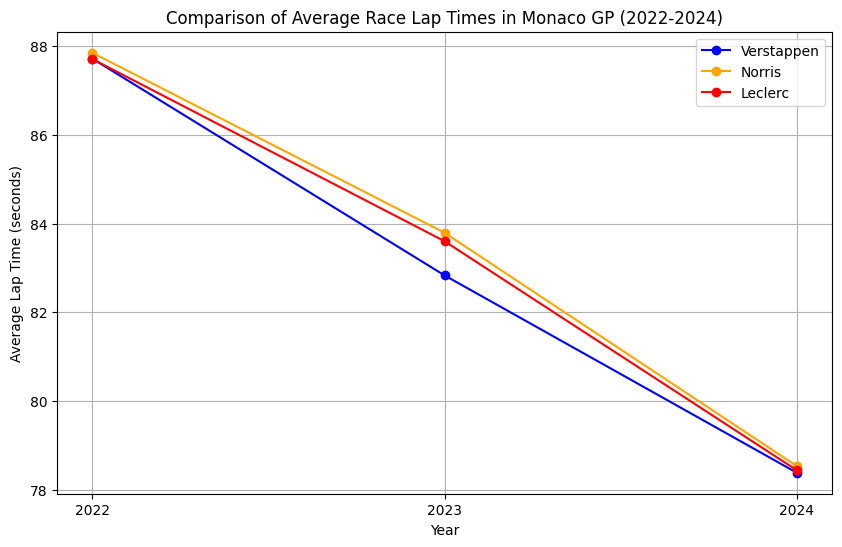

In [37]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(combined_avg_lap_df['Year'], combined_avg_lap_df['Verstappen'], marker='o', label='Verstappen', color='blue')
plt.plot(combined_avg_lap_df['Year'], combined_avg_lap_df['Norris'], marker='o', label='Norris',color='orange')
plt.plot(combined_avg_lap_df['Year'], combined_avg_lap_df['Leclerc'], marker='o', label='Leclerc',color='red')


plt.xlabel('Year')
plt.ylabel('Average Lap Time (seconds)')
plt.title('Comparison of Average Race Lap Times in Monaco GP (2022-2024)')
plt.legend()
plt.grid(True)
plt.xticks(combined_avg_lap_df['Year'])  
plt.show()

### Statistical Insights of Max Verstappen

In [ ]:
cache_dir = 'cache_dir'  
if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

# Enabling caching to store and load data quickly
fastf1.Cache.enable_cache(cache_dir)

years = [2022, 2023, 2024]
verstappen_lap_times = []

for year in years:
    verstappen_qualy = fastf1.get_session(year, 'Monaco', 'Q')
    verstappen_qualy.load()
    
    race = fastf1.get_session(year, 'Monaco', 'R')
    race.load()
    
    # Qualifying fastest lap for Verstappen
    qualy_laps = verstappen_qualy.laps.pick_drivers('VER')
    qualifying_fastest = qualy_laps['LapTime'].min()  # Fastest lap across all qualifying seasons
    qualifying_fastest_seconds = qualifying_fastest.total_seconds() if pd.notna(qualifying_fastest) else None
    
    # Use Q3 result if available
    qualy_result = verstappen_qualy.results[verstappen_qualy.results['Abbreviation'] == 'VER']
    q3_time = (qualy_result['Q3'].iloc[0].total_seconds() 
               if not qualy_result.empty and 'Q3' in qualy_result and pd.notna(qualy_result['Q3'].iloc[0]) 
               else None)
    
    # Race fastest lap for Verstappen
    race_laps = race.laps.pick_driver('VER')
    race_fastest = race_laps['LapTime'].min()
    race_fastest_seconds = race_fastest.total_seconds() if pd.notna(race_fastest) else None
    
    # joining the data
    verstappen_lap_times.append({
        'Year': year,
        'QualifyingFastestLap': qualifying_fastest_seconds,
        'Q3Time': q3_time,  # Optional: Q3-specific time
        'RaceFastestLap': race_fastest_seconds
    })

ver_lap_times_df_race_qualy = pd.DataFrame(verstappen_lap_times)


core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '11', '1', '4', '63', '14', '44', '5', '31', '22', '77', '20', '3', '47', '23', '10', '18', '6', '24']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data 

In [39]:
# Display results
print("Max Verstappen's Fastest Lap Times at the Monaco GP (2022 to 2024):")
ver_lap_times_df_race_qualy

Max Verstappen's Fastest Lap Times at the Monaco GP (2022 to 2024):


,Year,QualifyingFastestLap,Q3Time,RaceFastestLap
0,2022,71.666,71.666,76.052
1,2023,71.365,71.365,76.604
2,2024,70.567,70.567,74.569


core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '11', '1', '4', '63', '14', '44', '5', '31', '22', '77', '20', '3', '47', '23', '10', '18', '6', '24']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
r

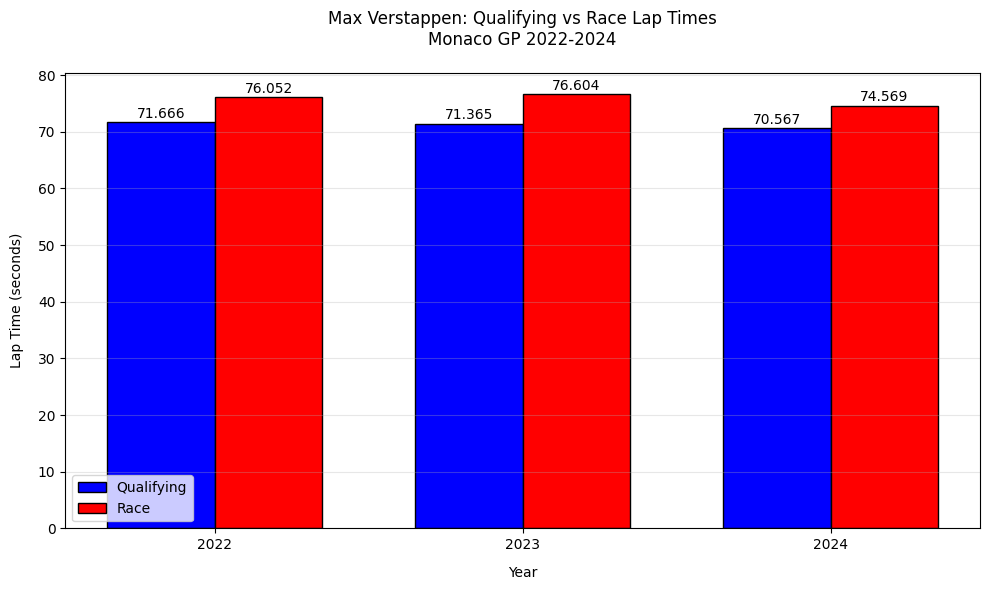

In [40]:
# Enabling caching to store and load data quickly
fastf1.Cache.enable_cache('cache_dir')

years = [2022, 2023, 2024]
verstappen_times = []

for year in years:
    try:
        # Qualifying data
        quali = fastf1.get_session(year, 'Monaco', 'Q')
        quali.load()
        q_laps = quali.laps.pick_drivers(['VER'])
        q_fastest = q_laps.pick_fastest()
        q_time = q_fastest['LapTime'].total_seconds()
        
        # Race data
        race = fastf1.get_session(year, 'Monaco', 'R')
        race.load()
        r_laps = race.laps.pick_drivers(['VER'])
        r_fastest = r_laps.pick_fastest()
        r_time = r_fastest['LapTime'].total_seconds()
        
        verstappen_times.append({
            'Year': year,
            'Quali': q_time,
            'Race': r_time
        })
        
    except Exception as e:
        print(f"Error loading {year} data: {e}")

# Create DataFrame
df = pd.DataFrame(verstappen_times)

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = df['Year']

plt.bar(x - bar_width/2, df['Quali'], width=bar_width, 
        color='blue', label='Qualifying', edgecolor='black')
plt.bar(x + bar_width/2, df['Race'], width=bar_width, 
        color='red', label='Race', edgecolor='black')

# Adding text labels on top of bars
for i, (q, r) in enumerate(zip(df['Quali'], df['Race'])):
    plt.text(x[i] - bar_width/2, q + 0.3, f'{q:.3f}', ha='center', va='bottom')
    plt.text(x[i] + bar_width/2, r + 0.3, f'{r:.3f}', ha='center', va='bottom')

plt.title("Max Verstappen: Qualifying vs Race Lap Times\nMonaco GP 2022-2024", pad=20)
plt.xlabel("Year", labelpad=10)
plt.ylabel("Lap Time (seconds)", labelpad=10)
plt.xticks(df['Year'])
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Standard Deviation of Race Lap time for Max Verstappen

In [41]:
# Enabling caching to store and load data quickly
fastf1.Cache.enable_cache('cache_dir')

# Years to analyze
years = [2022, 2023, 2024]
verstappen_std_dev = []

for year in years:
    # Load the race session
    race = fastf1.get_session(year, 'Monaco', 'R')
    race.load()
    
    # Get Verstappen's lap data
    laps = race.laps.pick_driver('VER')
    
    # Excluding pit laps (in-laps and out-laps)
    race_laps = laps[laps['PitInTime'].isna() & laps['PitOutTime'].isna()]
    
    # Convert lap times to total seconds
    lap_times_seconds = race_laps['LapTime'].dt.total_seconds()
    
    # Calculate standard deviation of lap times
    std_dev = lap_times_seconds.std()
    
    # Storing the result
    verstappen_std_dev.append({
        'Year': year,
        'Standard_Deviation_Lap_Time': std_dev
    })

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['11', '55', '1', '16', '63', '4', '14', '44', '77', '5', '10', '31', '3', '18', '6', '24', '22', '23', '47', '20']
c:\Users\Roopak Mallik\AppData\Local\Programs\Python\Python313\L

In [42]:
verstappen_std_dev_df = pd.DataFrame(verstappen_std_dev)
print(verstappen_std_dev_df)

   Year  Standard_Deviation_Lap_Time
0  2022                    14.830075
1  2023                     8.502561
2  2024                     2.380197


2022: Verstappen had significant lap time fluctuations, likely due to factors like traffic, tyre degradation, or race strategy changes.<br>
2023: He improved his consistency, but still had some variations.<br>
2024: His lap times were the most stable, showing that he maintained a steady race pace with minimal fluctuations.

### The fastest lap times for Verstappen, Leclerc, and Norris from both qualifying and race sessions of the Monaco Grand Prix for 2022, 2023, and 2024

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '11', '1', '4', '63', '14', '44', '5', '31', '22', '77', '20', '3', '47', '23', '10', '18', '6', '24']
core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data 

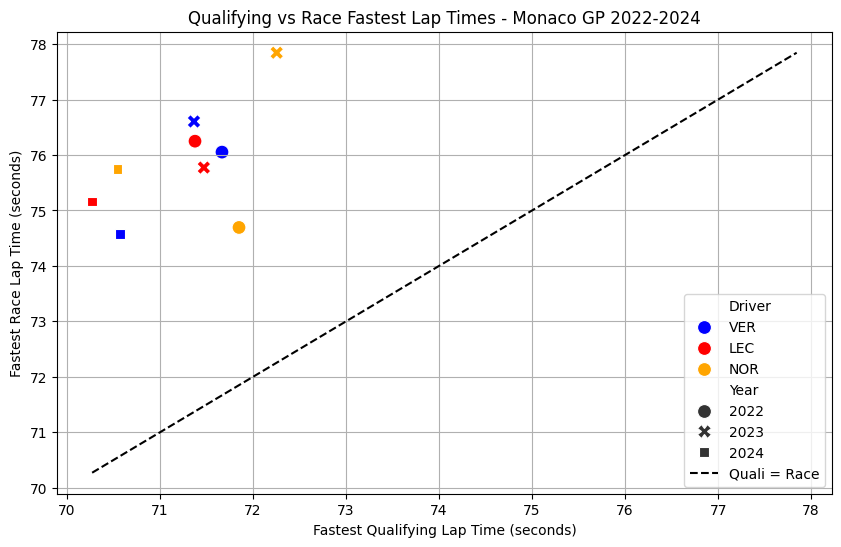

In [43]:
# Enable caching to speed up data loading (optional, adjust the directory as needed)
fastf1.Cache.enable_cache('cache_dir')

# Define the years and drivers
years = [2022, 2023, 2024]
drivers = ['VER', 'LEC', 'NOR']  # Verstappen, Leclerc, Norris

# empty list to store data
data = []

# data for each year and driver
for year in years:
    # qualifying session
    session_q = fastf1.get_session(year, 'Monaco', 'Q')
    session_q.load()
    
    # race session
    session_r = fastf1.get_session(year, 'Monaco', 'R')
    session_r.load()
    
    # Getting the fastest lap times for each driver
    for driver in drivers:
        # Qualifying fastest lap time
        try:
            fastest_lap_q = session_q.laps.pick_driver(driver).pick_fastest()
            quali_time = fastest_lap_q['LapTime'].total_seconds()
        except:
            quali_time = np.nan  # handling missing or irrelevant lap times
        
        # Race fastest lap time
        try:
            fastest_lap_r = session_r.laps.pick_driver(driver).pick_fastest()
            race_time = fastest_lap_r['LapTime'].total_seconds()
        except:
            race_time = np.nan  # handling missing or irrelevant lap times
        
        # Store the data
        data.append({
            'Year': year,
            'Driver': driver,
            'QualiTime': quali_time,
            'RaceTime': race_time
        })

# Create a DataFrame
df = pd.DataFrame(data)

# Defining the color palette for each driver
palette = {
    'VER': 'blue',   # Verstappen (Red Bull)
    'LEC': 'red',    # Leclerc (Ferrari)
    'NOR': 'orange'  # Norris (McLaren)
}

# Plotting the data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='QualiTime', y='RaceTime', hue='Driver', style='Year', 
                palette=palette, s=100)

min_time = min(df['QualiTime'].min(), df['RaceTime'].min())
max_time = max(df['QualiTime'].max(), df['RaceTime'].max())
plt.plot([min_time, max_time], [min_time, max_time], 'k--', label='Quali = Race')

plt.xlabel('Fastest Qualifying Lap Time (seconds)')
plt.ylabel('Fastest Race Lap Time (seconds)')
plt.title('Qualifying vs Race Fastest Lap Times - Monaco GP 2022-2024')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


##
 Verstappen (blue) shows a range of performances, with 2022 and 2023 points clustering around 74-76 seconds for both qualifying and race.<br>
Leclerc (red) has a notable 2023 race time outlier near 78 seconds, indicating a slower lap compared to his qualifying time.<br>
Norris (yellow) shows variability, with a 2022 race time around 75 seconds and a 2024 qualifying time near 73 seconds.

### Speed Trace of Max, Charles and Norris for 2024 Monaco GP

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']
c:\Users\Roopak Mallik\AppData\Local\Programs\Python\Python313\

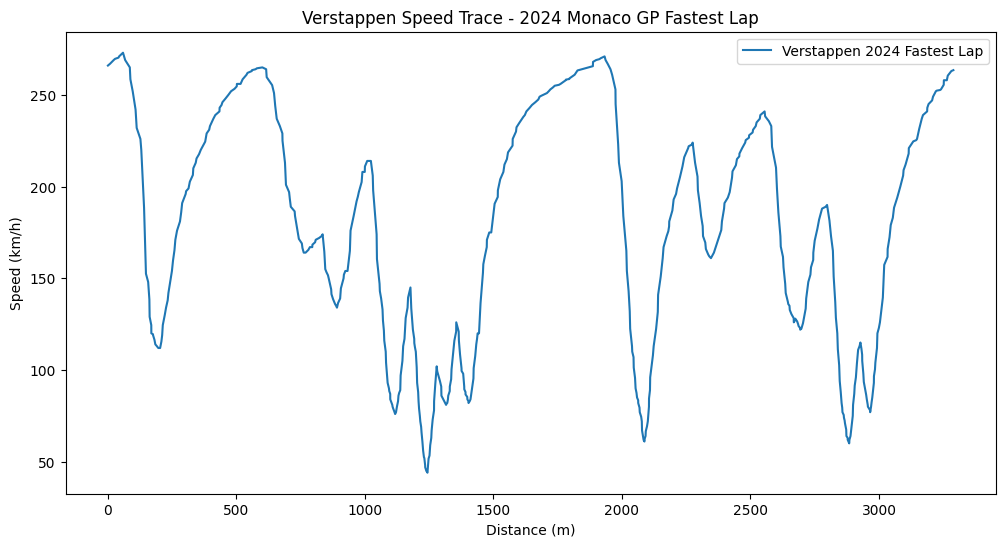

In [44]:
race_2024 = fastf1.get_session(2024, 'Monaco', 'R')
race_2024.load()

# Get fastest lap telemetry data for Verstappen
fastest_lap_ver = race_2024.laps.pick_driver('VER').pick_fastest()
telemetry_ver = fastest_lap_ver.get_telemetry()

# Plotting the speed trace
plt.figure(figsize=(12, 6))
plt.plot(telemetry_ver['Distance'], telemetry_ver['Speed'], label='Verstappen 2024 Fastest Lap')
plt.title('Verstappen Speed Trace - 2024 Monaco GP Fastest Lap')
plt.xlabel('Distance (m)')
plt.ylabel('Speed (km/h)')
plt.legend()
plt.show()

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']
c:\Users\Roopak Mallik\AppData\Local\Programs\Python\Python313\

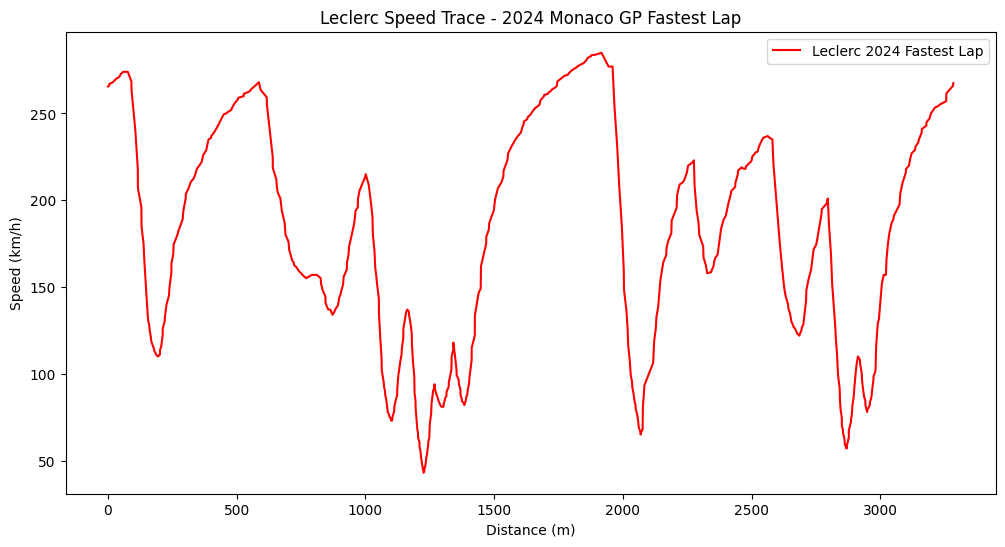

In [45]:
race_2024 = fastf1.get_session(2024, 'Monaco', 'R')
race_2024.load()

# Get fastest lap telemetry data for Leclerc
fastest_lap_lec = race_2024.laps.pick_driver('LEC').pick_fastest()
telemetry_lec = fastest_lap_lec.get_telemetry()

# Plotting the speed trace
plt.figure(figsize=(12, 6))
plt.plot(telemetry_lec['Distance'], telemetry_lec['Speed'], label="Leclerc 2024 Fastest Lap", color="red")
plt.title("Leclerc Speed Trace - 2024 Monaco GP Fastest Lap")
plt.xlabel("Distance (m)")
plt.ylabel("Speed (km/h)")
plt.legend()
plt.show()

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']
c:\Users\Roopak Mallik\AppData\Local\Programs\Python\Python313\

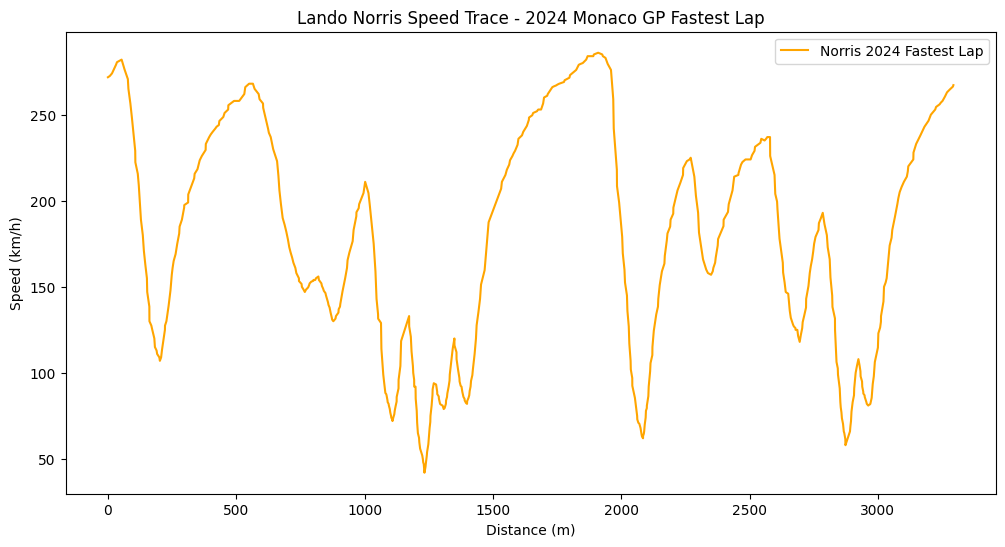

In [46]:
race_2024 = fastf1.get_session(2024, 'Monaco', 'R')
race_2024.load()

# Get fastest lap telemetry data for Lando Norris
fastest_lap_norris = race_2024.laps.pick_driver('NOR').pick_fastest()
telemetry_norris = fastest_lap_norris.get_telemetry()

# Plotting the speed trace
plt.figure(figsize=(12, 6))
plt.plot(telemetry_norris['Distance'], telemetry_norris['Speed'], label="Norris 2024 Fastest Lap", color="orange")
plt.title("Lando Norris Speed Trace - 2024 Monaco GP Fastest Lap")
plt.xlabel("Distance (m)")
plt.ylabel("Speed (km/h)")
plt.legend()
plt.show()